## Hotel Reviews Analysis

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a DataFrame
df = pd.read_excel('Data Analyst - Test Data.xlsx')

df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [106]:
pd.to_datetime(df['date'], format='%Y/%m/%d')

0      2019-08-20
1      2019-08-20
2      2019-08-20
3      2019-08-20
4      2019-08-19
          ...    
6443   2019-07-12
6444   2019-07-12
6445   2019-07-10
6446   2019-07-10
6447   2019-07-10
Name: date, Length: 6448, dtype: datetime64[ns]

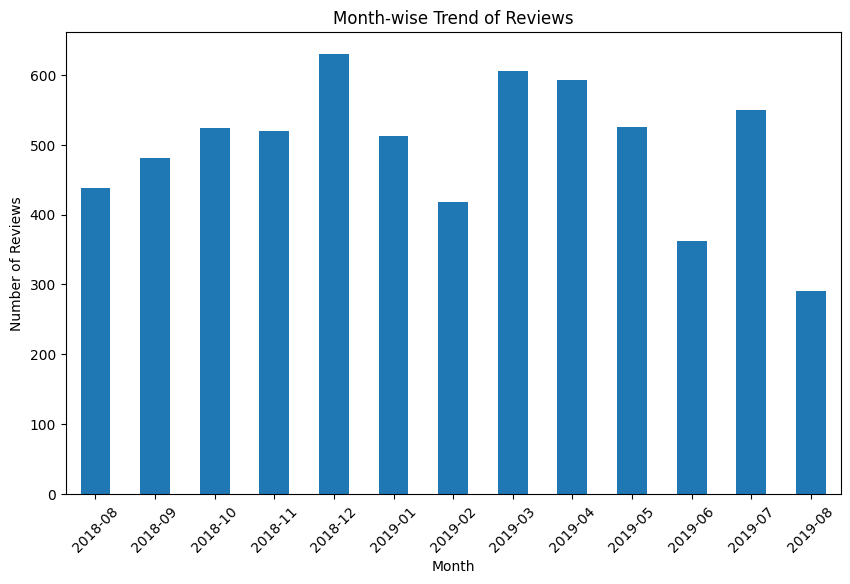

In [107]:
df['Month'] = df['date'].dt.to_period('M')

# Count the number of reviews per month
month_wise_trend = df['Month'].value_counts().sort_index()

# Plot the month-wise trend
plt.figure(figsize=(10, 6))
month_wise_trend.plot(kind='bar')
plt.title('Month-wise Trend of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

 The little spike in the number of reviews in December indicates a peak in customer feedback during the holiday season. However, the lower number of reviews in August 2019 compared to the previous year's August may be attributed to incomplete data for that particular month, rather than a significant drop in customer activity. and also the graph is preety much stagnant

In [62]:
cities_mapping = {
    'NYC': 'New York',
    'NY': 'New York',
    'New York, NY': "New York",
    'London': 'United Kingdom'
    
}

# Use the replace method to change U.S. cities to "United States" in the 'Location' column
df['Location'] = df['Location'].replace(cities_mapping)

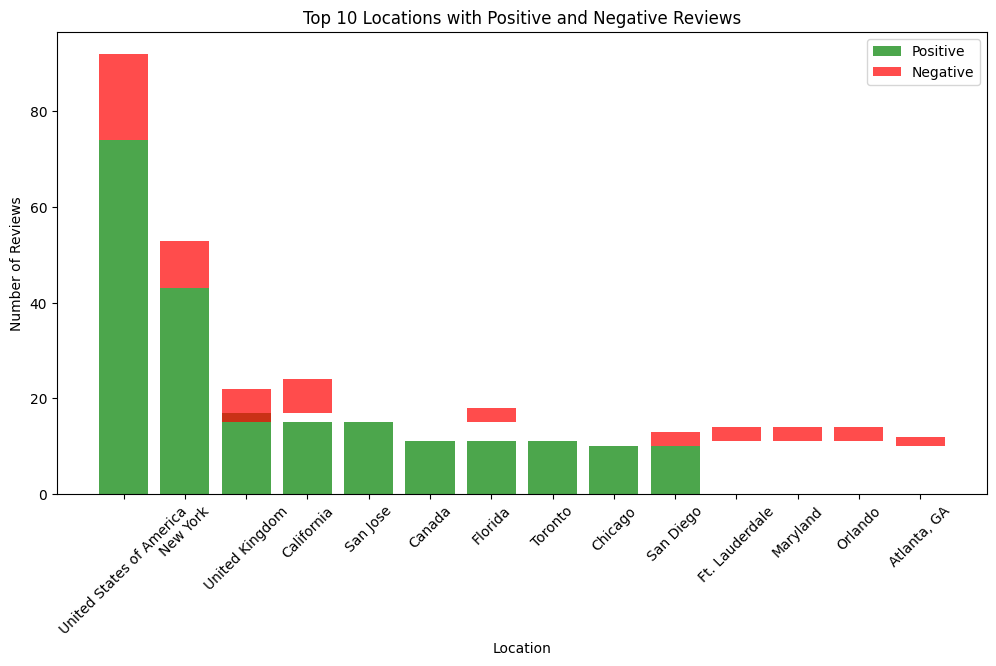

In [79]:
# Create columns to identify positive and negative reviews
df['Positive Review'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in positive_keywords))
df['Negative Review'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in negative_keywords))

# Group the data by location
location_grouped = df.groupby('Location')

# Calculate the number of positive and negative reviews for each location
positive_counts = location_grouped['Positive Review'].sum()
negative_counts = location_grouped['Negative Review'].sum()

# Select the top 5 locations with the most positive and negative reviews
top_positive_locations = positive_counts.nlargest(10)
top_negative_locations = negative_counts.nlargest(10)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None

# Plot positive reviews
p1 = plt.bar(top_positive_locations.index, top_positive_locations, color='g', alpha=0.7)

# Plot negative reviews on top of positive reviews
bottom = top_positive_locations
p2 = plt.bar(top_negative_locations.index, top_negative_locations, color='r', alpha=0.7, bottom=bottom)

plt.title('Top 10 Locations with Positive and Negative Reviews')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.show()

**The United States Reigns Supreme:** The bulk of the reviews originate from the United States, underlining its dominance in contributing feedback. Notably, New York City emerges as the focal point of review activity, showcasing a significant influx of customer opinions. Following the United States, the United Kingdom establishes itself as a substantial source of reviews, reinforcing its global presence.

**Stars and Stripes State Leaders:** Within the United States, California and San Jose are discernible as prominent locations, boasting a substantial share of the reviews. These regions exemplify the diversity of feedback across the country.

**International Appeal:** Beyond the United States, Canada carves a niche as a remarkable source of reviews, contributing to the global appeal of the platform.

**A World of Positivity:** Intriguingly, the reviews outside the United States exclusively encompass positive sentiments. This trend highlights the platform's untapped potential for expanding its business footprint beyond U.S. borders, offering growth opportunities in international markets."

In [13]:
df = df.dropna()

In [64]:
df.head()

,Review,date,Location,Year,Month
5647,"After a long trip to get to NY and looking it,...",2018-08-01,NaN,2018,8
5649,Very bad experience in this hotel... When we m...,2018-08-01,NaN,2018,8
5650,We stayed here when we visited the Empire Stat...,2018-08-01,NaN,2018,8
5651,Clean. Comfortable bed. Wonderful service- sta...,2018-08-01,NaN,2018,8
5652,We spent four nights in the New Yorker and enj...,2018-08-01,NaN,2018,8


<Figure size 1000x600 with 0 Axes>

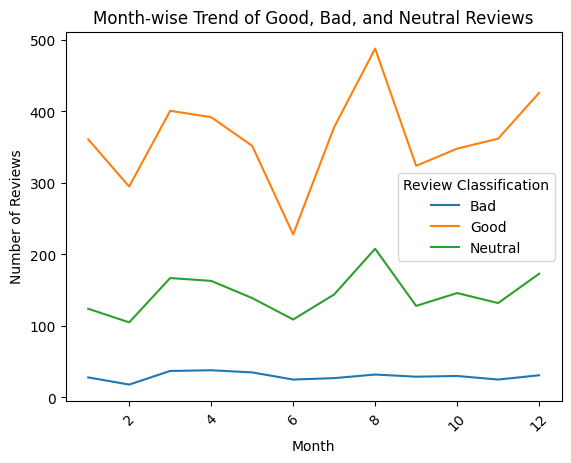

In [65]:
positive_keywords = ["praised", "loved", "great", "excellent", "clean", "good", "best", "helpful", "friendly", "convenient", "pleasant", "professional", "comfy", "nice", "great", "loved", "fantastic"]
negative_keywords = ["needed improvement", "poor", "bad", "uncomfortable", "unclean", "dirty", "terrible", "worst", "disgusting", "rude", "Didn’t like", "not friendly", "not very good", "not very friendly", "unpleasant", "unprofessional", "not nice", "smelly", "dusty", "horrible", "disappointed", "Hopeless"]

positive_keywords += ["amazing", "wonderful", "impressive", "outstanding", "top-notch", "stellar", "perfect", "terrific", "awesome", "incredible", "ideal", "delightful", "satisfactory", "exceptional", "superb", "fantastic"]
negative_keywords += ["abysmal", "atrocious", "lousy", "appalling", "dreadful", "inferior", "pathetic", "subpar", "awful", "unsatisfactory", "deplorable", "disastrous", "miserable", "shoddy", "displeasing", "unacceptable", "dismal", "inferior", "substandard"]

# Define a function to classify reviews as "Good," "Bad," or "Neutral" based on keywords
def classify_review(row):
    review_text = str(row['Review']).lower()  # Convert to lowercase for case-insensitive matching
    if any(keyword in review_text for keyword in positive_keywords):
        return 'Good'
    elif any(keyword in review_text for keyword in negative_keywords):
        return 'Bad'
    else:
        return 'Neutral'

# Create a new column to label reviews as "Good," "Bad," or "Neutral"
# Create a new column to label reviews as "Good," "Bad," or "Neutral"
df['Review Classification'] = df.apply(classify_review, axis=1)

# Group the reviews by month and review classification
month_wise_trend = df.groupby(['Month', 'Review Classification']).size().unstack().fillna(0)

# Plot the month-wise trend as a line chart
plt.figure(figsize=(10, 6))
month_wise_trend.plot(kind='line')
plt.title('Month-wise Trend of Good, Bad, and Neutral Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Review Classification')
plt.show()


The trend line for Month-wise Trend of Good, Bad, and Neutral Reviews over time shows a consistent number of good reviews throughout the months. 

Percentage of Positive Room Quality Reviews: 69.67%
Percentage of Negative Room Quality Reviews: 15.49%


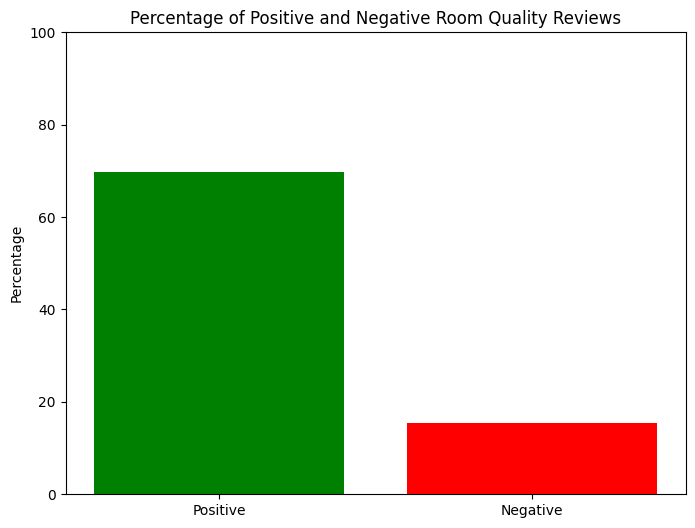

More guests had positive feedback about room quality.


In [80]:
# Fill NaN values in the 'Review' column with an empty string
df['Review'].fillna('', inplace=True)

# Define keywords for positive and negative feedback
positive_keywords = ["praised", "loved", "great", "excellent", "clean", "good", "best", "helpful", "friendly", "convenient", "pleasant", "professional", "comfy", "nice", "great", "loved", "fantastic"]
negative_keywords = ["needed improvement", "poor", "bad", "uncomfortable", "unclean", "dirty", "terrible", "worst", "disgusting", "rude", "Didn’t like", "not friendly", "not very good", "not very friendly", "unpleasant", "unprofessional", "not nice", "smelly", "dusty", "horrible", "disappointed", "Hopeless"]

positive_keywords += [
    "spacious", "luxurious", "cozy", "elegant", "well-furnished", "immaculate", "tidy", "neat", "well-maintained", "modern", 
    "beautiful", "gorgeous", "lovely", "comfortable bed", "peaceful", "serene", "quiet", "well-appointed", "stylish", "chic"
]

negative_keywords += [
    "cramped", "dingy", "outdated", "worn-out", "shabby", "neglected", "dilapidated", "musty", "stained", "poorly lit", 
    "noisy", "unpleasant odor", "poorly ventilated", "cluttered", "inadequate storage", "inconvenient layout", "unappealing decor", 
    "uncomfortable mattress", "disrupted sleep", "overpriced"
]

# Create columns to identify positive and negative room quality feedback
df['Positive Room Quality'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in positive_keywords))
df['Negative Room Quality'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in negative_keywords))

# Calculate the percentage of positive and negative room quality feedback
total_reviews = len(df)
positive_reviews = df['Positive Room Quality'].sum()
negative_reviews = df['Negative Room Quality'].sum()

percentage_positive = (positive_reviews / total_reviews) * 100
percentage_negative = (negative_reviews / total_reviews) * 100

# Print the results
print(f"Percentage of Positive Room Quality Reviews: {percentage_positive:.2f}%")
print(f"Percentage of Negative Room Quality Reviews: {percentage_negative:.2f}%")

# Create a bar chart to visualize the percentages
labels = ['Positive', 'Negative']
percentages = [percentage_positive, percentage_negative]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['green', 'red'])
plt.title('Percentage of Positive and Negative Room Quality Reviews')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set the y-axis limit to 0-100
plt.show()

# Interpretation
if percentage_positive > percentage_negative:
    print("More guests had positive feedback about room quality.")
elif percentage_positive < percentage_negative:
    print("More guests had negative feedback about room quality.")
else:
    print("Positive and negative feedback about room quality are balanced.")



Positive feedback regarding room quality appears to be a consistent trend, as evidenced by the absence of significant fluctuations in monthly bookings. This suggests that guests consistently appreciate the quality of the rooms, contributing to stable and positive feedback over time.

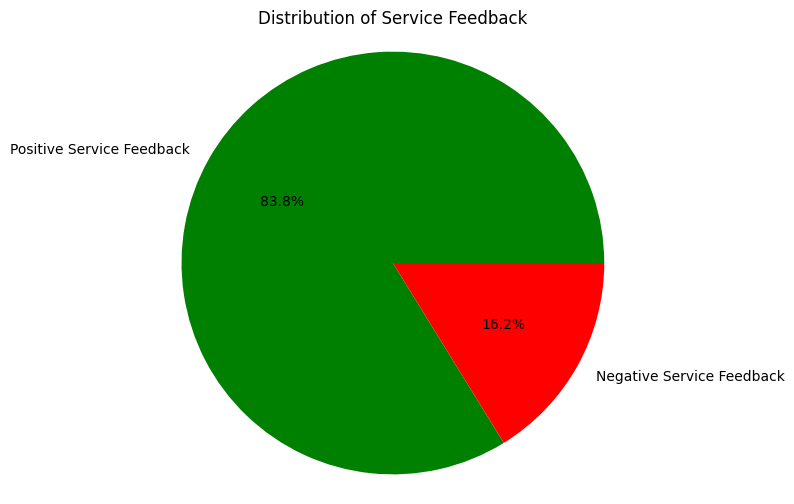

More guests had positive feedback about the service.


In [81]:

# Define keywords for positive and negative service feedback
positive_service_keywords = [
    "praised", "loved", "great", "excellent", "clean", "good", "best", "helpful", "friendly", "convenient", 
    "pleasant", "professional", "comfy", "nice", "great", "loved", "fantastic",
    "outstanding", "exceptional", "attentive staff", "impeccable service", "warm hospitality", "efficient check-in",
    "prompt response", "helpful concierge", "quick room service", "well-maintained facilities", "impressive amenities",
    "comfortable bedding", "spacious room", "scenic view", "quiet atmosphere", "convenient location",
    "delicious breakfast", "great value for money"
]
negative_service_keywords = [
    "needed improvement", "poor", "bad", "uncomfortable", "unclean", "dirty", "terrible", "worst", "disgusting", 
    "rude", "Didn’t like", "not friendly", "not very good", "not very friendly", "unpleasant", "unprofessional", 
    "not nice", "smelly", "dusty", "horrible", "disappointed", "Hopeless", "unhelpful staff", "inattentive service",
    "poorly managed", "slow check-in", "inadequate response", "rude concierge", "delayed room service",
    "lack of maintenance", "dated facilities", "disappointing amenities", "uncomfortable bedding", "cramped room",
    "noisy environment", "inconvenient location", "subpar breakfast", "overpriced", "unsanitary conditions", 
    "unsatisfactory experience"
]

# Create columns to identify positive and negative service feedback
df['Positive Service Feedback'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in positive_service_keywords))
df['Negative Service Feedback'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in negative_service_keywords))

# Calculate the percentage of positive and negative service feedback
total_reviews = len(df)
positive_service_reviews = df['Positive Service Feedback'].sum()
negative_service_reviews = df['Negative Service Feedback'].sum()

percentage_positive_service = (positive_service_reviews / total_reviews) * 100
percentage_negative_service = (negative_service_reviews / total_reviews) * 100

feedback_types = ['Positive Service Feedback', 'Negative Service Feedback']
percentages = [percentage_positive_service, percentage_negative_service]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=feedback_types, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribution of Service Feedback')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Interpretation
if percentage_positive_service > percentage_negative_service:
    print("More guests had positive feedback about the service.")
elif percentage_positive_service < percentage_negative_service:
    print("More guests had negative feedback about the service.")
else:
    print("Positive and negative feedback about the service are balanced.")

The abundance of positive feedback related to the service quality is a contributing factor to the sustained level of bookings. The high volume of positive service reviews aligns with the consistent demand for bookings, indicating that exceptional service plays a pivotal role in maintaining booking levels.

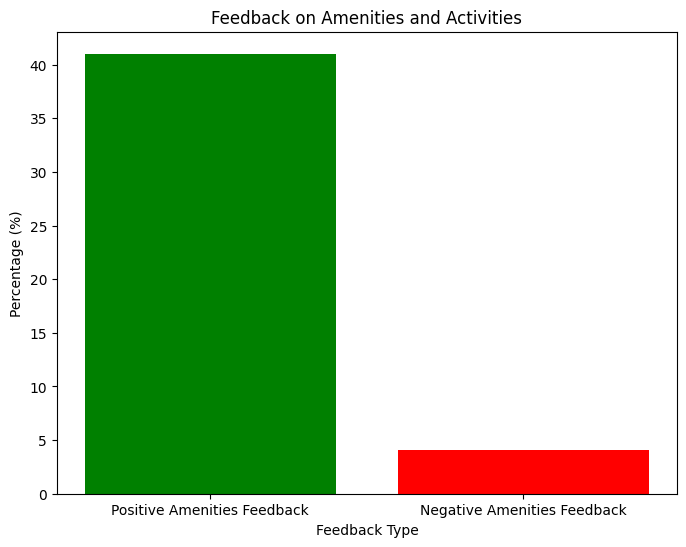

More guests had positive feedback about the amenities and activities.


In [82]:
# Define keywords for positive and negative feedback on amenities and activities
positive_amenities_keywords = [
    "pool", "breakfast", "parking", "restaurant", "wifi", "cleanliness", "value", "spacious", "modern",
    "scenic view", "comfy bed", "great location", "friendly staff", "free amenities", "kids-friendly",
    "pet-friendly", "well-maintained", "amenities", "entertainment", "convenient",
]

negative_amenities_keywords = [
    "noise", "crowded", "smelly", "cleaning issues", "poor service", "maintenance problems", "parking difficulties",
    "security concerns", "limited wifi", "food quality", "overpriced", "lack of amenities", "privacy issues",
    "inconvenient location", "cramped space", "uncomfortable bed", "outdated facilities", "inadequate security","not working"
]

# Create columns to identify positive and negative feedback on amenities and activities
df['Positive Amenities Feedback'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in positive_amenities_keywords))
df['Negative Amenities Feedback'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in negative_amenities_keywords))

# Calculate the percentage of positive and negative amenities feedback
total_reviews = len(df)
positive_amenities_reviews = df['Positive Amenities Feedback'].sum()
negative_amenities_reviews = df['Negative Amenities Feedback'].sum()

percentage_positive_amenities = (positive_amenities_reviews / total_reviews) * 100
percentage_negative_amenities = (negative_amenities_reviews / total_reviews) * 100

feedback_types = ['Positive Amenities Feedback', 'Negative Amenities Feedback']
percentages = [percentage_positive_amenities, percentage_negative_amenities]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(feedback_types, percentages, color=['green', 'red'])
plt.title('Feedback on Amenities and Activities')
plt.xlabel('Feedback Type')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()

# Interpretation
if percentage_positive_amenities > percentage_negative_amenities:
    print("More guests had positive feedback about the amenities and activities.")
elif percentage_positive_amenities < percentage_negative_amenities:
    print("More guests had negative feedback about the amenities and activities.")
else:
    print("Positive and negative feedback about the amenities and activities are balanced.")

A substantial number of guests expressed favorable sentiments regarding the available amenities and activities. This positive feedback underscores the appeal and satisfaction guests find in the range of offerings, enhancing their overall experience during their stay.

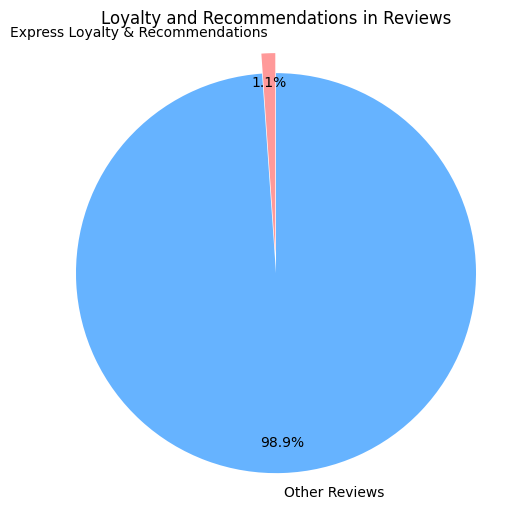

Several guests expressed loyalty and recommendations in their reviews.


In [86]:
loyalty_keywords = [
    "willing to return", "will return", "recommend to others", "highly recommend", 
    "loyal customer", "coming back", "repeat visit", "loyalty program", 
    "customer satisfaction", "trustworthy", "loyal guest", "loyalty reward", 
    "preferred choice", "customer loyalty", "trusty hotel", "regular guest", 
    "loyalty discount", "loyalty card", "loyalty benefits","Excellent","Awesome","best hotel"
]


# Create a column to identify reviews expressing loyalty and recommendations
df['Loyalty and Recommendations'] = df['Review'].str.lower().apply(lambda x: any(keyword in x for keyword in loyalty_keywords))

# Calculate the percentage of reviews expressing loyalty and recommendations
total_reviews = len(df)
loyalty_recommendation_reviews = df['Loyalty and Recommendations'].sum()
percentage_loyalty_recommendation = (loyalty_recommendation_reviews / total_reviews) * 100

labels = ['Express Loyalty & Recommendations', 'Other Reviews']
sizes = [percentage_loyalty_recommendation, 100 - percentage_loyalty_recommendation]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.title('Loyalty and Recommendations in Reviews')
plt.show()

# Interpretation
if percentage_loyalty_recommendation > 0:
    print("Several guests expressed loyalty and recommendations in their reviews.")
else:
    print("There were no reviews expressing loyalty and recommendations in the dataset.")

Numerous guests demonstrated their loyalty and wholehearted endorsement in their reviews, highlighting a strong sense of satisfaction and a willingness to recommend the establishment to others.